# Decision Trees

## Uniformity of data

Let us start with a question: how do we test if a collection of data points is *more uniform* than another set of data points.  For example if we had the following datasets, which is more *random* and which is more *self-similar*?

In [1]:
data1 <- c(0,1,0,1,1,1,0,0,0,1)
data2 <- c(0,0,0,0,0,0,0,0,0,0)

## Entropy

Let us assume we have a discrete collection of points $\{x_1,\ldots,x_N\}$ where each $x_i$ is chosen from a fixed finite set $D=\{a_1,\ldots,a_k\}$, and by counting the number of occurences of each $a_i$ we get a *finite probability distribution*:

$$ p(a_i) = \frac{n_i}{N} $$

So, for example for the datasets above:

In [2]:
table(data1)
table(data2)

data1
0 1 
5 5 

data2
 0 
10 

The entropy of a dataset is defined as *the expected value* of the negative of the logarithm of the probabilities.  This measures the randomness of our data:

$$ H(D) = -\sum_i p_i\log_2(p_i) $$

Let us calculate this for the datasets we had:

In [3]:
fn <- function(x){
    if(x==0.0)
        return(0.0)
    else 
        return(x*log(x))
}

entropy <- function(xs) {
    temp <- table(xs)/length(xs)
    ent <- 0.0
    for(i in 1:length(temp))
        ent = ent + fn(temp[i])
    return(-ent/log(2))
} 

In [4]:
entropy(data1)
entropy(data2)

0 
1

0 
0

## The Gini coefficient

The gini coefficient is invented by econometricists to measure the amount of inequality within a dataset.  Assume $\{x_1,\ldots,x_N\}$ measures the income levels of a population.  The gini coefficient for the economic inequality is then calculated as

$$ \frac{\sum_{i,j} |x_i-x_j|}{2N\sum_i x_i} $$

This is better expressed in terms of expected value of the differences within the population:

$$ \sum_{i<j} p(x_i)p(x_j)|x_i - x_j| = \frac{1}{2 N^2}\sum_{i,j} n_i n_j |x_i - x_j| $$

In [5]:
gini1 <- (0.5)*(0.5)*abs(0-1)
gini2 <- (0.0)*(1.0)*abs(0-1)
gini1
gini2

[1] 0.25

[1] 0

## Decision Trees

The algorithm is based on the following simple idea: split the data set into finitely many pieces such that each piece is uniform within itself.  This means each piece must have very small entropy or gini coefficient.

In [6]:
column1 <- c(1,1,1,0)
column2 <- c(1,0,1,0)
data <- cbind(column1,column2)
data

column1,column2
1,1
1,0
1,1
0,0


Which of the following groupings is better?

In [7]:
grouping1 <- c(c(0),c(1,0,1))
grouping2 <- c(c(1,1),c(1,0))

### Information gain (or relative entropy)

Information gain of a feature is the entropy of that column. For the data above, the entropies of each column is calculated as

In [8]:
entropy(column1)
entropy(column2)

0 
0.8112781

0 
1

So, we need to prefer the column with the largest entropy to split the dataset.

If the data is continous, then we split the data at some point $x_0$ such that we get two classes, say 'left' and 'right' where points $a$ with $a<x_0$ are labelled as 'left' and points $a>x_0$ are labelled as 'right'. Among all possible splittings, we should prefer the one with the largest entropy.  We then recursively split the data set until we achieve uniform subsets.


### An example

Let us look at the iris dataset in R:

In [9]:
library(rpart)
library(rpart.plot)

head(iris)
test <- sample(1:150,50)
testData <- iris[test,]
trainData <- iris[-test,]

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


,Species,seto vers virg,,,,,,,,
2,setosa,[1.00 .00 .00],when,Petal.Length,<,2.6,,,,
6,versicolor,[ .00 .89 .11],when,Petal.Length,>=,2.6,&,Petal.Width,<,1.8
7,virginica,[ .00 .04 .96],when,Petal.Length,>=,2.6,&,Petal.Width,>=,1.8


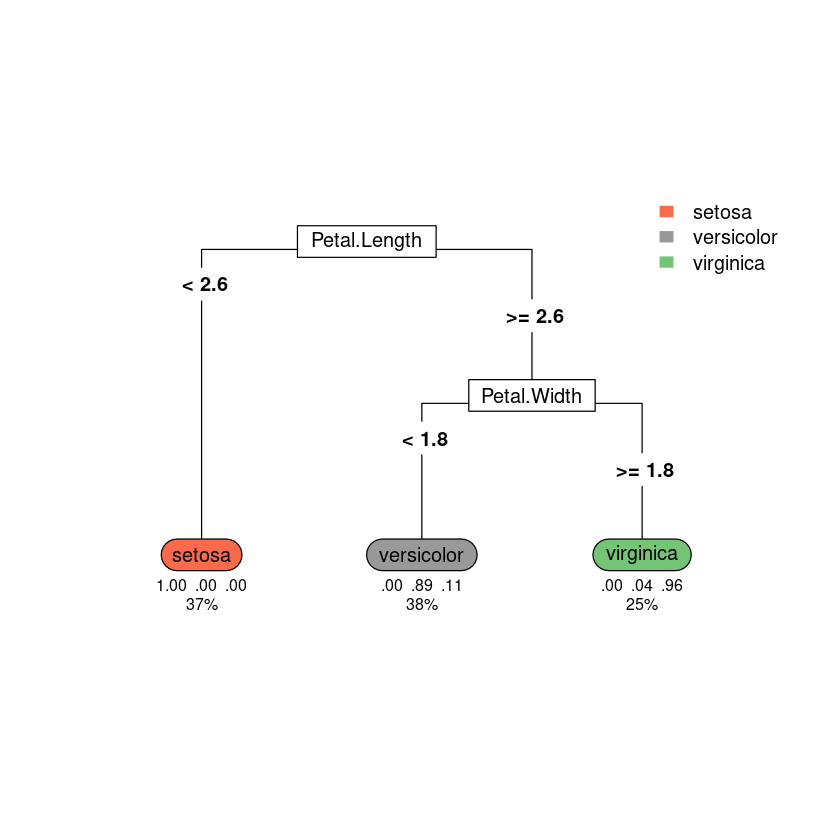

In [10]:
model <- rpart(Species ~ . , data=trainData)
rpart.plot(model, type = 5, clip.right.labs = TRUE, branch = 1, under = TRUE)
rpart.rules(model)

In [11]:
temp <- predict(model,testData)
head(temp)
predicted <- c()
for(i in 1:nrow(temp)) 
    predicted <- c(predicted,names(which.max(temp[i,])))

table(predicted,real=testData$Species)

,setosa,versicolor,virginica
59,0,0.8947368,0.1052632
102,0,0.0400000,0.9600000
95,0,0.8947368,0.1052632
41,1,0.0000000,0.0000000
145,0,0.0400000,0.9600000
15,1,0.0000000,0.0000000


            real
predicted    setosa versicolor virginica
  setosa         13          0         0
  versicolor      0         15         1
  virginica       0          0        21

### Another example

In [12]:
german <- read.csv("http://freakonometrics.free.fr/german_credit.csv")
german$Creditability <- factor(german$Creditability)
head(german)

Creditability,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,⋯,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
1,1,18,4,2,1049,1,2,4,2,⋯,4,2,21,3,1,1,3,1,1,1
1,1,9,4,0,2799,1,3,2,3,⋯,2,1,36,3,1,2,3,2,1,1
1,2,12,2,9,841,2,4,2,2,⋯,4,1,23,3,1,1,2,1,1,1
1,1,12,4,0,2122,1,3,3,3,⋯,2,1,39,3,1,2,2,2,1,2
1,1,12,4,0,2171,1,3,4,3,⋯,4,2,38,1,2,2,2,1,1,2
1,1,10,4,0,2241,1,2,1,3,⋯,3,1,48,3,1,2,2,2,1,2


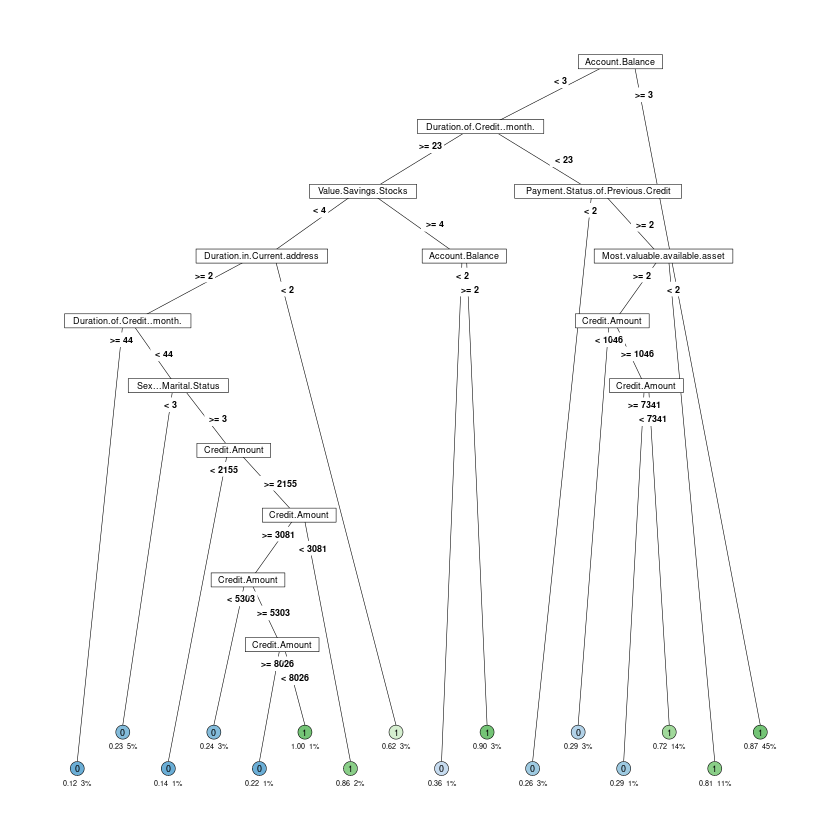

In [13]:
M <- nrow(german)
test <- sample(1:M,0.25*M)
testData <- german[test,]
trainData <- german[-test,]
model <- rpart(Creditability ~ . , data=trainData)
rpart.plot(model, type = 5, clip.right.labs = TRUE, branch = .1, under = TRUE)

In [14]:
temp <- predict(model,testData)
predicted <- ifelse(temp>0.8,1,0)
table(predicted[,2],real=testData$Creditability)

   real
      0   1
  0  44  41
  1  27 138

# Decision Tree Regression

Instead of splitting the data and classifying it with respect to a feature, we can run a *regression* using decision trees. The aim of the Decision-Tree-Regression is to split the data such that we get response variable as *locally constant*.

,Volume,,,,,,
4,18,when,Girth,<,12,,
5,31,when,Girth,is,12,to,16
3,56,when,Girth,>=,,,16


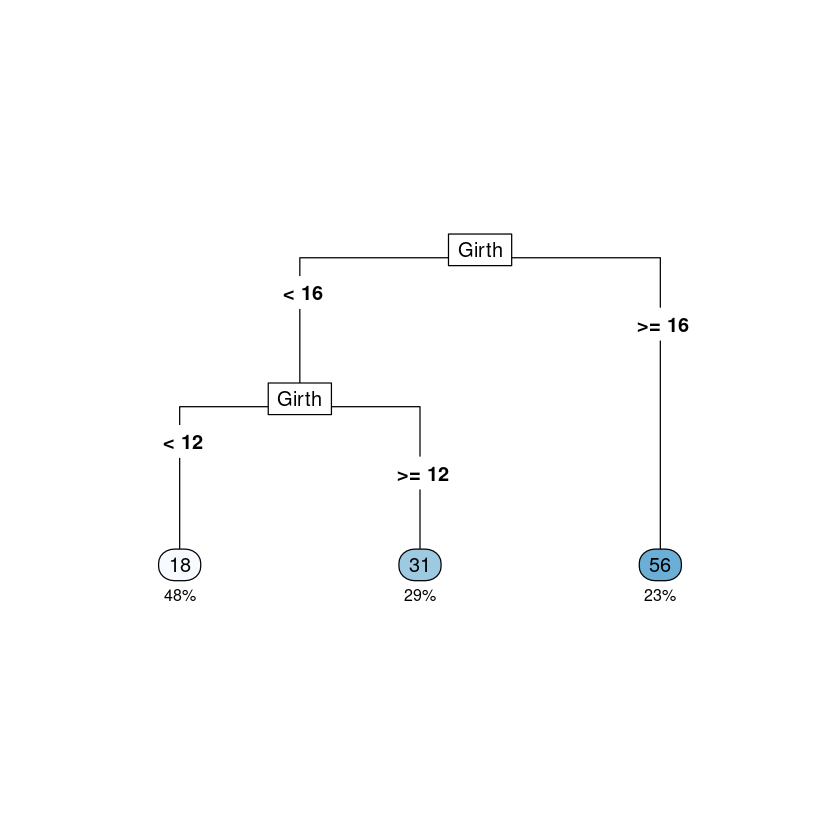

In [15]:
model <- rpart(Volume ~ . , data=trees)
rpart.plot(model, type=5, under=TRUE)
rpart.rules(model)

# Random Forests

Random forests is an ensemble machine learning algorithm: Ensemble algorithms combine several ML algorithms which may individually be not very successful, and yet used together yield a better result. In the case of random forests, the algorithm constructs several decision trees and then combine the result.

In [16]:
library(randomForest)

randomForest(Species ~ . , data=iris)
randomForest(Creditability ~ . , data=german)
randomForest(Volume ~ . , data=trees)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.



Call:
 randomForest(formula = Species ~ ., data = iris) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         50          0         0        0.00
versicolor      0         47         3        0.06
virginica       0          3        47        0.06


Call:
 randomForest(formula = Creditability ~ ., data = german) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 23.5%
Confusion matrix:
    0   1 class.error
0 130 170  0.56666667
1  65 635  0.09285714


Call:
 randomForest(formula = Volume ~ ., data = trees) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 46.47578
                    % Var explained: 82.23

In [17]:
library(MASS)

Boston$chas <- factor(Boston$chas)

randomForest(chas ~ . , data=Boston)


Call:
 randomForest(formula = chas ~ ., data = Boston) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 8.5%
Confusion matrix:
    0 1 class.error
0 462 9  0.01910828
1  34 1  0.97142857

In [18]:
N <- nrow(Boston)
test <- sample(1:N, 0.25*N)
testData <- Boston[test,]
trainData <- Boston[-test,]
model <- randomForest(medv ~ . , data=trainData)
model


Call:
 randomForest(formula = medv ~ ., data = trainData) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 11.73719
                    % Var explained: 85.67

In [19]:
mean(mapply(function(x) { x*x }, predict(model,testData)-testData$medv))

[1] 9.928985